In [18]:
import numpy as np
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.modeling import models, fitting

%matplotlib inline

In [ ]:
#Load the data



#Write your own line function
#Linear, Gaussian, and Blackbody model objects in Astropy.modeling
#Use astroquery to pull info 
#Linear -- 
#Gaussian -- 
#Write a statistic [include links to materials about something other than chi-square]
#Fit with scipy 

#Making simulated data with noise
#Blackbody -- fake the data
#Add Noise
#Fit it
#See if you get the same temp

## How to simulate a dataset with noise

In this example, we will simulate a black body spectrum with noise.

First, we will load the [black body module](http://docs.astropy.org/en/stable/modeling/#module-astropy.modeling.blackbody) from `Astropy.modeling`

In [1]:
from astropy.modeling.blackbody import blackbody_lambda, blackbody_nu

Now let's set up our model grid for $\lambda$ (the wavelength of the light).  Note that $c = \lambda \nu$, where $\nu$ is the frequency and $c$ is the speed of light.

We will call the variable `wavelength` because `lambda` is a built-in Python construct that we won't be able to use as a variable name.

In [19]:
wmin, wmax = np.log10(1000.), np.log10(20000.)  # log Angstroms
nbins      = 1000.  # Number of 
wavelength = np.logspace(wmin, wmax, nbins) * u.AA  # Angstroms

We'll be using the equation $F_{\lambda} = ???$ with a reasonable temperature for a stellar surface like our sun.

In [24]:
temperature = 6000. * u.K  # Kelvin
intensity_lambda = blackbody_lambda(wavelength, temperature)

Let's see what units were returned by the blackbody function.

In [26]:
print(intensity_lambda.unit)

erg / (Angstrom cm2 s sr)


For a perfectly spherical stellar point source, we multiply the intensity by a factor of $\pi$ (or something) steridians (the sr unit).  

If we want to estimate the number of photon counts in our image, then we also need to multiply the flux by the effective area of our telescope, an exposure time, and the energy of the photons as each wavelength.

In [36]:
solid_angle    = np.pi * u.sr
effective_area = 1.e6 * u.cm**2
exposure_time  = 10.0 * 60. * u.s  # 10 minutes in units of seconds
photon_energy  = wavelength.to(u.erg, equivalencies=u.spectral())  # See astropy.units tutorial

estimated_counts = intensity_lambda * solid_angle * effective_area * exposure_time / photon_energy

What are the units on estimated_counts?  Why?

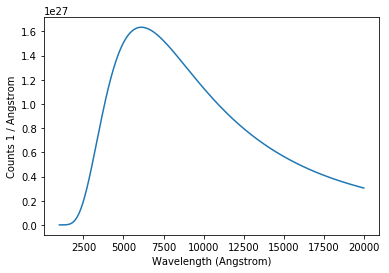

In [42]:
plt.plot(wavelength, estimated_counts)
plt.xlabel("Wavelength (%s)" % wavelength.unit)
plt.ylabel("Counts %s" % estimated_counts.unit)

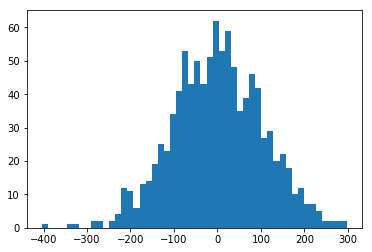

In [26]:
# Generate random data
# To begin, we need to define our Guassian parameters (e.g. the mean and standard deviation)
mean  = 0 # This is our mean
sigma = 100 # This is our standard deviation

# To generate our data, we can use the numpy random generator normal distribution function.
# Let's create 1000 points for now. 
gaussian_data = np.random.normal(mean, sigma, 1000)

# bin data and plot a histogram; overplot your guassian fit
# To visualize our data, let's bin it into 50 bins
bins  = 50
_ = plt.hist(gaussian_data, bins)

#count, bins, ignored = plt.hist(GausData, 30, normed=True)
#plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
#                np.exp( - (bins - mean)**2 / (2 * sigma**2) ),
#          linewidth=2, color='r')
#plt.show()

<Container object of 3 artists>

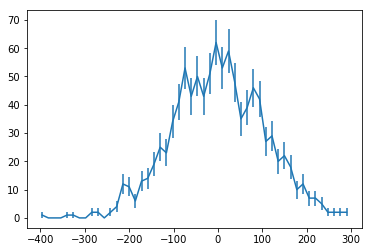

In [29]:
hist_values, bin_edges = np.histogram(gaussian_data, bins)
hist_error = np.sqrt(hist_values)
bin_center = 0.5 * (bin_edges[:-1] + bin_edges[1:])

plt.errorbar(bin_center, hist_values, yerr=hist_error)

Try playing with the number of data points and see how that changes our error bars. 